# TOKIO 2020(1) - OLYMPIC GAMES EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS
### FELIPE BASURTO BARRIO - IE SCHOOL OF SCIENCE AND TECHNOLOGY

## Details
This dataset contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics.
We are going to go through it and visualize the data and see if we can find some cool insights!

All data has been previously cleaned and prepared for making the visualization process easier

In [112]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
import nbformat

In [141]:
# Creating the different dataframes we are going to use
athletes = pd.read_excel("https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/Athletes.xlsx")
medals = pd.read_excel("https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/Medals.xlsx")
gender = pd.read_excel("https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/EntriesGender.xlsx")
teams = pd.read_excel("https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/Teams.xlsx")
olympic_timeseries = pd.read_csv('https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/olympic_ts.csv')
population = pd.read_csv('https://raw.githubusercontent.com/felipebasurto/tokio2021-exploratory-data-analysis/main/DATA/2023_population.csv')

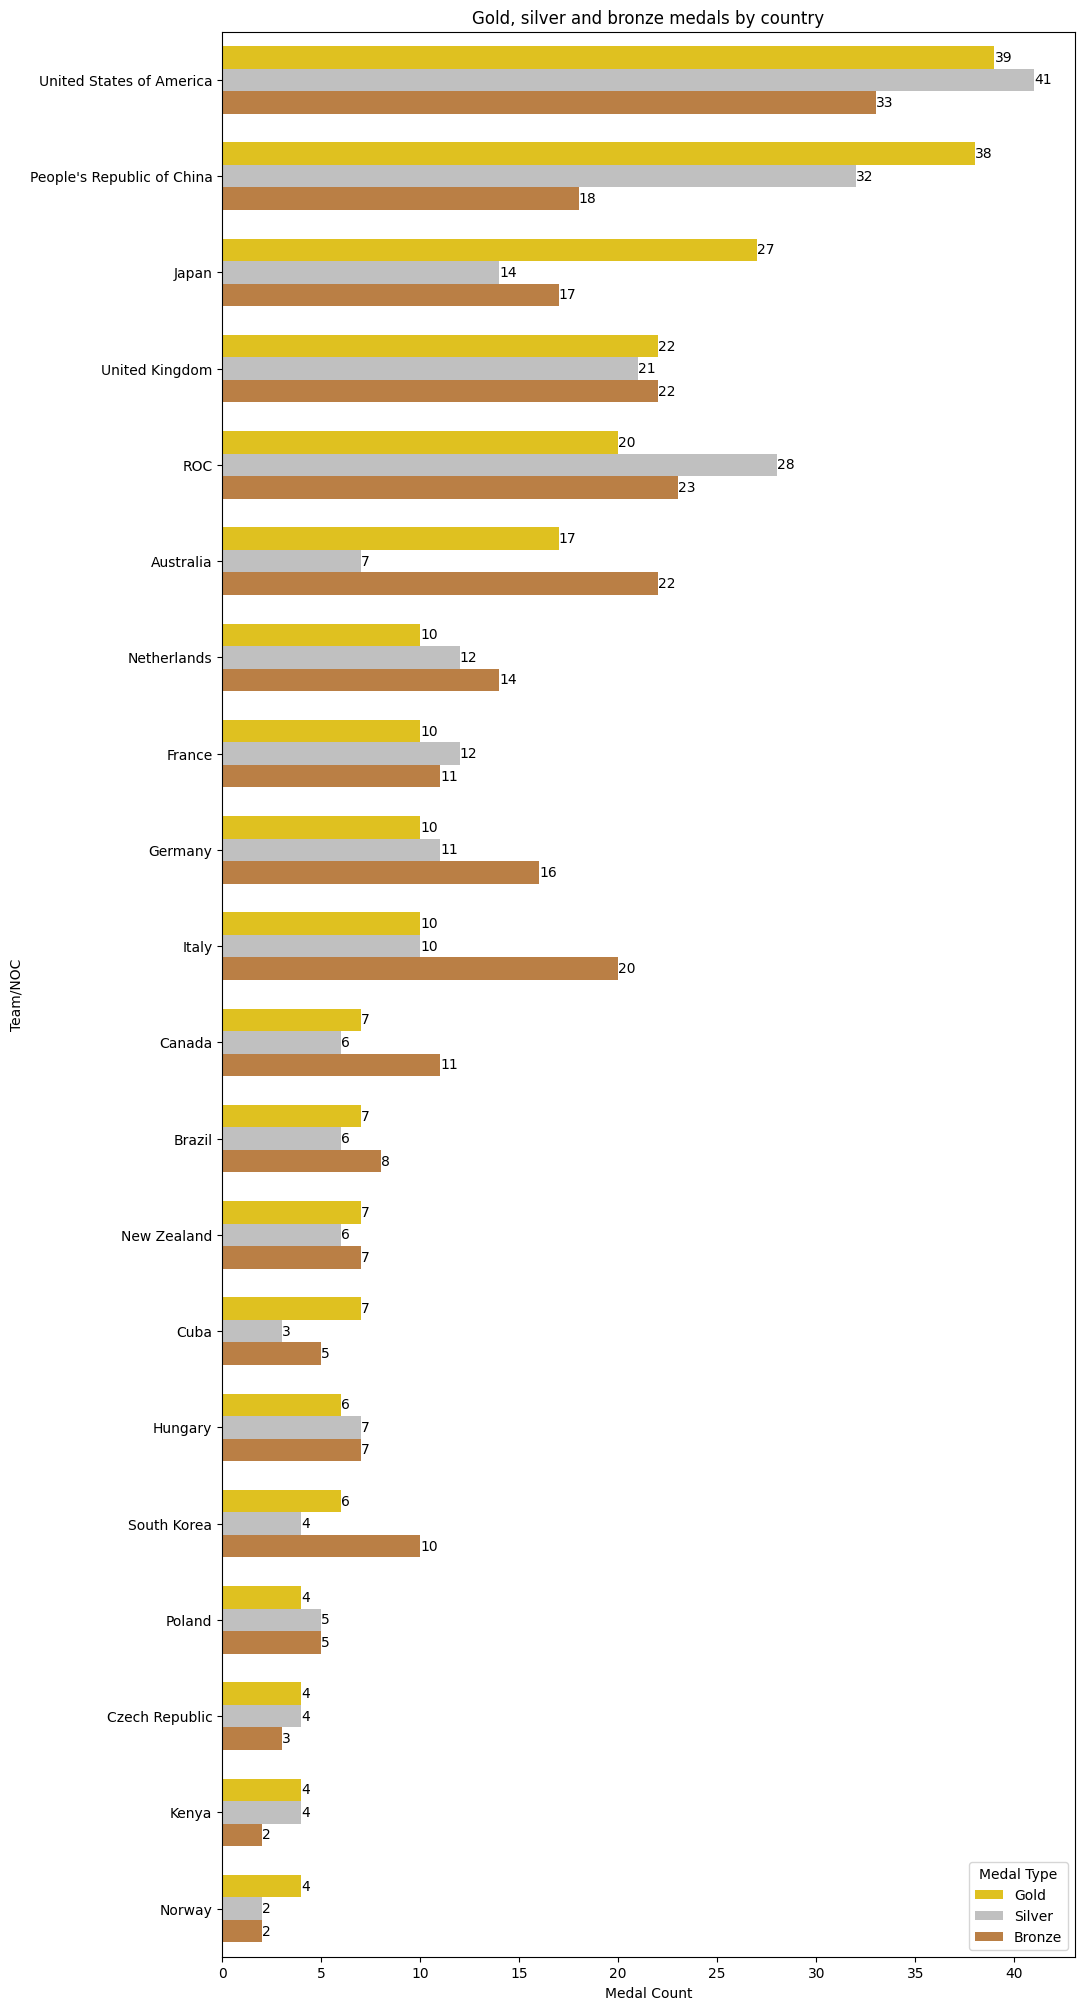

In [114]:
# This code reshapes and plots top 20 teams' medals data using seaborn and melt function of pandas. It creates a stacked bar chart showing the count 
# of each medal type for each team using the specified colors. The count of medals is also labeled on top of each bar.

medals_melted = medals.head(20).melt(id_vars=["Team/NOC","Total","Rank"], 
                            value_vars=["Gold", "Silver", "Bronze"],
                            var_name="Medal Type", value_name="Medal Count")

plt.figure(figsize=(11,25))
plt.title("Gold, silver and bronze medals by country")
medal_colors = {"Gold": "#ffd700", "Silver": "#c0c0c0", "Bronze": "#cd7f32"}
ax = sns.barplot(x = 'Medal Count', y = 'Team/NOC', hue='Medal Type', data=medals_melted, palette=medal_colors, width = 0.7)
for p in ax.containers:
    ax.bar_label(p,size=10)
plt.show()

From this graph we can interpret a lot of things, first thing that comes to our minds is that the usual countries are on top (USA and China).
But then, instead of something like Russia or the United Kingdom, we find Japan; which means that they did an incredible job preparing to host the olympics, this
can be because of the sanctions that Russia had because of the doping scandal they were involved, preventing the athletes from participating as the "Russian federation".
Other funny things can be for example the inmense amount of bronze medals that italy won, with a total of 20, even surpassing China.

In [115]:
# This code creates a scatter plot on a geographical map showing the total medals won by each country, represented by markers. 
# The color and size of the markers are based on the total medals won and hovering over a marker shows the country name. 

fig = px.scatter_geo(medals, locations='Team/NOC', locationmode='country names', color='Total',
                     hover_name='Team/NOC', size='Total', size_max=20,
                     projection='natural earth')

fig.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

From this geo-spatial graph we are able to have an idea on more or less how the different continents of the world perform in sports. Meanwhile Europe is the one with the most medal winners, the huge powerful countries that China and the USA are make their continents stand out too. We cannot see the same case in South America or Africa, where the sports that give the most medals happen to be not that popular.

In [116]:
# Now we are taking the latest 2023 population data and refactoring our dataframe, discarding the other data which is useless for us.
population = population[["country", "2023_last_updated"]]

In [117]:
# Merging the Medals and the Population dataframes. Then, calculating the number of medals won by each country, per capita.

medals_population = pd.merge(medals, population, left_on='Country', right_on='country', how='left')
medals_population = medals_population[['Team/NOC','Total','2023_last_updated']]
medals_population.rename(columns={'Team/NOC':'Country','Total':'Medals','2023_last_updated':'Population'}, inplace=True)
medals_population.dropna(inplace=True)
medals_population['Population'] = medals_population['Population'].str.replace(',','').astype(int)
medals_population["medals_per_capita"] = medals_population["Medals"]/medals_population["Population"]

In [118]:
# Plotting the scatter data to see whats going on

fig = px.scatter(medals_population, x = medals_population["Population"], 
                 y = medals_population["medals_per_capita"],
                 color = "Medals",
                 hover_data=['Country'])

fig.update_traces(marker_size=10)
fig.show()

Okay, here there is a LOT to unpack. 
First off we have a HUGE outlier up on the top of the graph, San Marino. A country with a population similar to Soria but surprinsingly three medals (it is the smallest country to win an Olympic medal, surpassing Bermuda (pop. 70,000)).
It gets even crazier when you look it up on Google and realize they only brought FIVE ATHLETES to the olympics. That translates that they won a olympic medal for around each 11.000 citizens. That might not sound impressive until you compare it to the USA (One medal per 3 Million citizens) or China (1 medal per each 16 Million citizens).

On the other hand, we have other cases of a low rate of medals per capita, but they seem way more possible, such as India cases or China.

In [119]:
# Comparison between the cases of San Marino and China.

display(medals_population[medals_population["Country"] == "San Marino"])
display(medals_population[medals_population["Country"] == "People's Republic of China"])

,Country,Medals,Population,medals_per_capita
72,San Marino,3,33642,0.000089


,Country,Medals,Population,medals_per_capita
1,People's Republic of China,88,1425821208,6.171882e-08


If you were curious about what were the other countries, here is a graph showing the top 10. Another really impressing achievement (im such a sports nerd lol) its the case of Slovenia and The Netherlands. This is because the education that the kids recieve since a young age and the government investments in sports and all kinds of activities (Specially in Slovenia).
If you wanna read about it, here is some interesting info: https://www.slovenia.info/en/stories/what-is-the-secret-of-the-success-of-slovenian-athletes


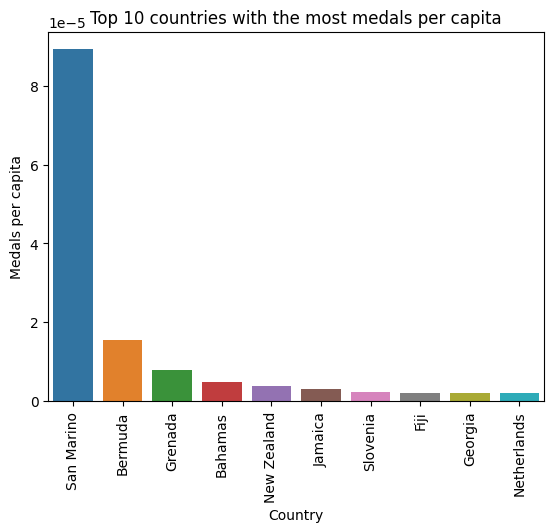

In [120]:
top_10 = medals_population[["Country", "medals_per_capita"]].sort_values("medals_per_capita", ascending=False).head(10)

sns.barplot(x="Country", y="medals_per_capita", data=top_10)
plt.xticks(rotation=90)
plt.ylabel("Medals per capita")
plt.title("Top 10 countries with the most medals per capita")
plt.show()

Okay, moving into the athletes section. Lets take a look into the dataframe. Seems like we have the full name of the athlete, country and discipline. Funny enough that there is a guy with "Abagnale" in his last name, which remembered me about Frank Abagnale, the person on which the movie starring leonardo di caprio is based: "Catch me if you can", really recommended.

In [121]:
athletes

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [122]:
# Preparing the athletes_per_country dataframe.
athletes_per_country = athletes.groupby("NOC").count()["Name"]
athletes_per_country = athletes_per_country.sort_values(ascending=False)
athletes_per_country = athletes_per_country.head(20).reset_index()
athletes_per_country.head(5)

,NOC,Name
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400


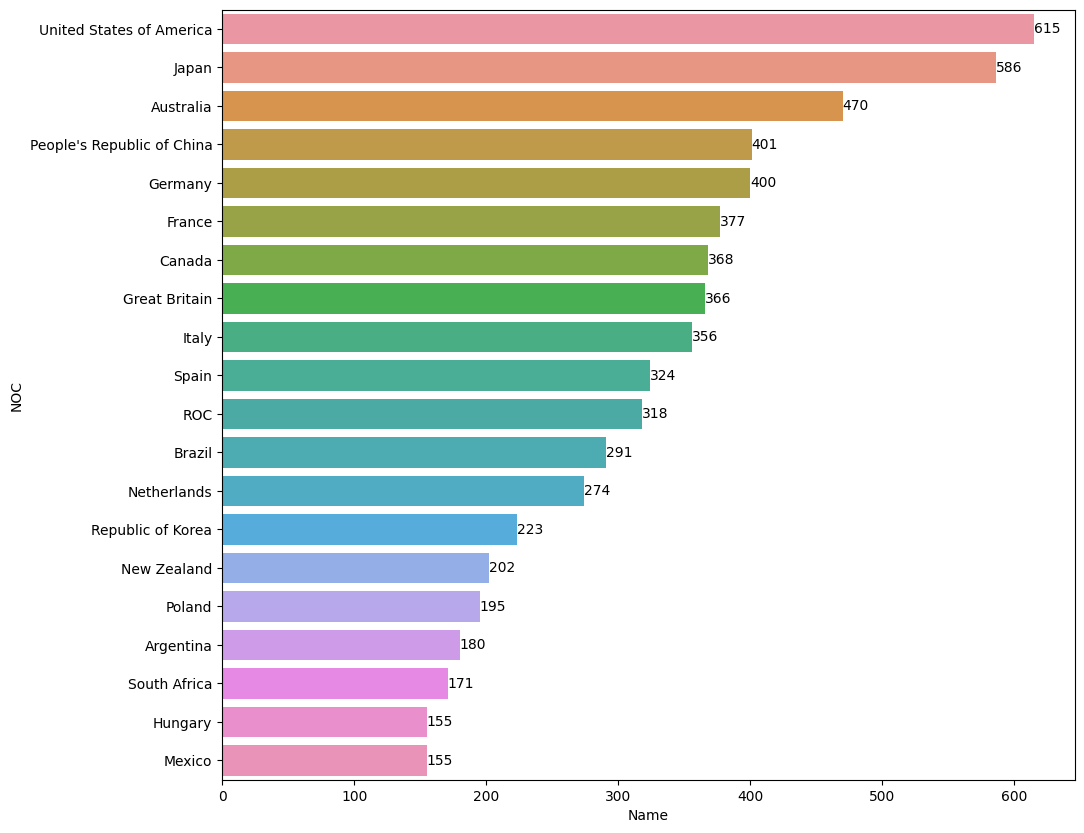

In [123]:
# Plotting said dataframe.

plt.figure(figsize=(11,10))

ax = sns.barplot(x='Name', y='NOC', data = athletes_per_country)

for p in ax.containers:
    ax.bar_label(p,size=10)
    
plt.show()

In [124]:
# Preparing the athletes_per_sport dataframe.

athletes_per_sport = athletes.groupby("Discipline").count()["Name"]
athletes_per_sport = athletes_per_sport.sort_values(ascending=False)
athletes_per_sport = athletes_per_sport.head(20).reset_index()

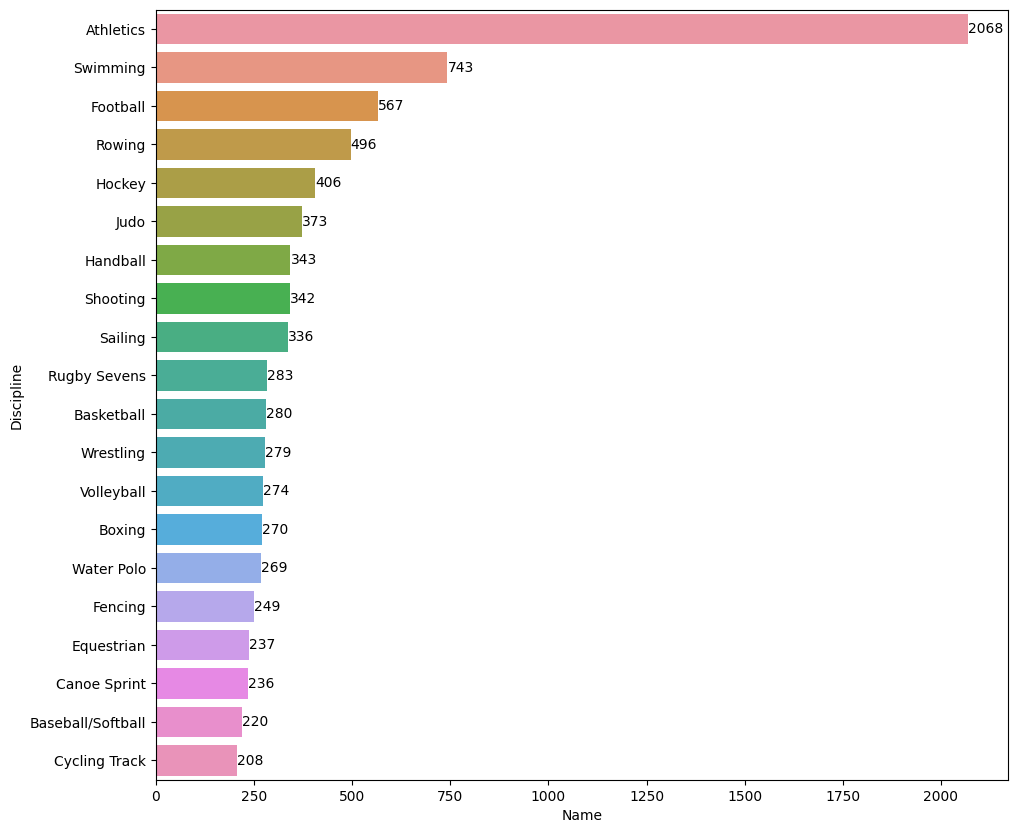

In [125]:
# Plotting it
plt.figure(figsize=(11,10))

ax = sns.barplot(x='Name', y='Discipline', data = athletes_per_sport)

for p in ax.containers:
    ax.bar_label(p,size=10)
    
plt.show()

Now its the turn to take a look into the Gender table. It has a strange shape, because tells us the number of men and women competing in each sport.

In [126]:
# We have to calculate the su of people from each gender to be able to correctly know how many males and females compete.

sum_male = gender["Male"].sum()
sum_female = gender["Female"].sum()

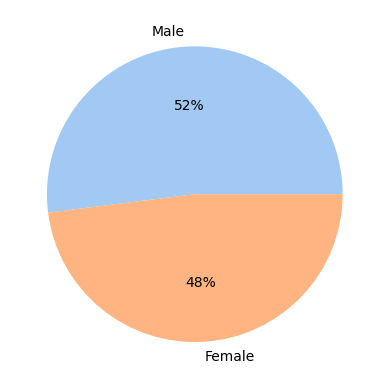

In [127]:
colors = sns.color_palette('pastel')[0:5]
plt.pie([sum_male, sum_female], autopct='%.0f%%', labels = ["Male", "Female"], colors = colors)

ax.set_title('Gender Discipline Comparison')
plt.show()

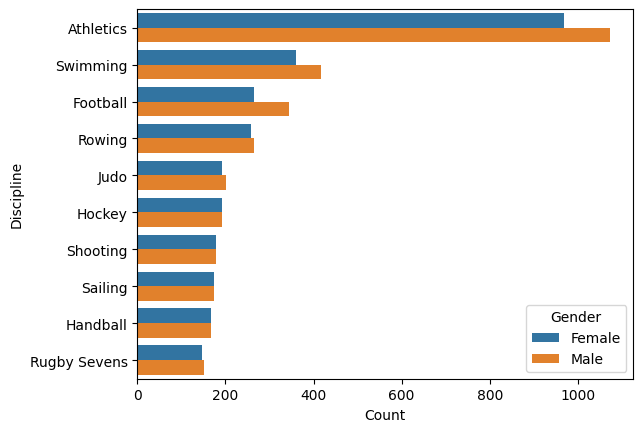

In [128]:
# This other graph is kinda tricky. We are trying to plot the gender difference between men and women in the sports with the most athletes.
# But since the dataframe has that weird shape we need to make use of the .melt() function that comes with

gender_head = gender.sort_values("Total",ascending=False).head(10)

gender_melted = gender_head.melt(id_vars=["Discipline"], 
                            value_vars=["Female", "Male"],
                            var_name="Gender", value_name="Count")


ax = sns.barplot(x='Count', y='Discipline', hue='Gender', data=gender_melted)
plt.show()

We can clearly see here that some categories are a little unbalance in terms of gender

In [136]:
gender[gender["Discipline"].isin(["Wrestling","Rhythmic Gymnastics","Artistic Swimming"])]

,Discipline,Female,Male,Total
3,Artistic Swimming,105,0,105
28,Rhythmic Gymnastics,96,0,96
45,Wrestling,96,193,289


Because this dataset was missing the medal count overtime and it turned impossible to find (it is mandatory for the assignment), we are going to use another dataset which has all the medal winners in the olympics of the last 100 years.

In [137]:
df_medals_per_year = olympic_timeseries.groupby("Year")["Medal"].count().reset_index()

fig = px.line(df_medals_per_year, x="Year", y="Medal", title="Number of Medals Won by Year")
fig.show()